# Qiskit notebook

In [22]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.extensions import HamiltonianGate
import numpy as np
import qiskit.tools.jupyter
%qiskit_version_table

# Circuits and measurements
Create quantum states:

In [23]:
# number of qubits
nq = 2

# generate statevector
psi = Statevector([0,1,0,0], 2**nq) # Statevector(vector, dimension = 2^(# qubits))
print("\nBraket notation:")
display(psi.draw('latex'))
print("\nVector notation:")
display(array_to_latex(psi))


Braket notation:


<IPython.core.display.Latex object>


Vector notation:


<IPython.core.display.Latex object>

Create circuit (no measurements):


Visualize circuit:


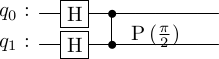

In [24]:
# measurement circuit
circ = QuantumCircuit(nq) # quantum circuit on nq qubits
circ.h(0) # Hadamard gate on qubit 0
circ.h(1) # Hadamard gate on qubit 1
circ.cp(np.pi/2,0,1) # phase gate on qubit 1, controlled on qubit 0
print("\nVisualize circuit:")
display(circ.draw('latex'))

In [25]:
U = Operator(circ) # turn quantum circuit into matrix
print("\n(Unitary) matrix representation:")
array_to_latex(U)


(Unitary) matrix representation:


<IPython.core.display.Latex object>

In [26]:
state = psi.evolve(circ) # apply quantum circuit "circ" to state "psi"
print("\n output:")
state.draw('latex')


 output:


<IPython.core.display.Latex object>

## Simulate circuit
Prepend initialization:


Visualize circuit with measurements and initialization:


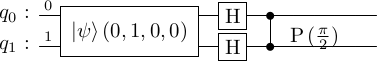

In [27]:
init = QuantumCircuit(nq)
init.initialize(psi) # hardcode initial state "psi" into circuit "init"
circ2 = circ.compose(init, range(nq), front=True) # compose the circuits "init" and "circ"
print("\nVisualize circuit with measurements and initialization:")
display(circ2.draw('latex'))

Add measurements:


Visualize circuit with measurements:


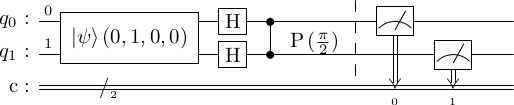

In [29]:
meas = QuantumCircuit(nq, nq) # measurement circuit on nq qubits and nq "readout" classical bits
meas.barrier(range(nq)) # visual dashed line
meas.measure(range(nq), range(nq)) # measure qubits 0 and 1, write output in classical bits 0 and 1 (resp.)
circ3 = circ2.compose(meas, range(nq)) # compose with previous circuit

print("\nVisualize circuit with measurements:")
circ3.draw('latex')

Compile and run the circuit:

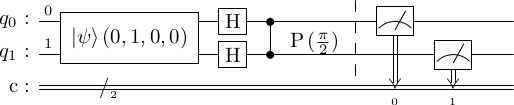


Measurement counts (out of 1024): {'01': 253, '10': 259, '00': 247, '11': 265}


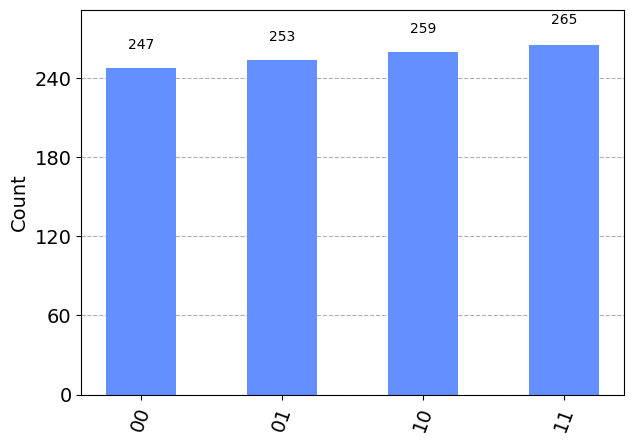

In [9]:
# transpile for simulator
simulator = Aer.get_backend('aer_simulator') # aer_simulator is a classical simulator for quantum circuits
circ3 = transpile(circ3, simulator) # transpile circuit in simulator language
display(circ3.draw('latex'))

# simulate circuit and get data
result = simulator.run(circ3).result()
counts = result.get_counts()
print("\nMeasurement counts (out of 1024):",counts)
plot_histogram(counts)

## Exercises on circuits

 - what is the outcome of the following circuits?
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex1.png" width="300">
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex2.png" width="400"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex3.png" width="400"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex4.png" width="500"/>
</div>

 - fill in:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/CNOT.png" width="500"/>
</div>

 - what is the outcome of the following circuits?
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex5.png" width="200"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/ex6.png" width="300"/>
</div>

## QFT exercise
verify circuit for 2-qubit quantum Fourier transform:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/F4.png" width="400">
</div>

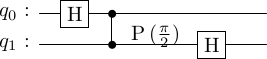

In [11]:
QFT = QuantumCircuit(2)
QFT.h(0) # hadamard on q1
QFT.cp(np.pi/2,0,1) # pi/2-rotation of q2 controlled on q1
QFT.h(1) # hadamard on q1
# QFT.swap(0,1) # swap on q1 and q2
QFT.draw(output='latex')

matrix representation: (note qiskit orders tensor products q1 \otimes q0!)

In [13]:
U = Operator(QFT)
print("\n(Unitary) matrix representation:")
array_to_latex(U)


(Unitary) matrix representation:


<IPython.core.display.Latex object>

# Hamiltonian simulation

Qiskit has functionality for Hamiltonian simulation:

In [32]:
HamSim = QuantumCircuit(1)
expH = HamiltonianGate([[0,1],[1,0]],1)
HamSim = HamSim.compose(expH, [0])
HamSim.draw('latex')

## Exercises Hamiltonian simulation
 - verify the following equations:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/XHZH.png" width="500"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/expZ.png" width="500"/>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/expX.png" width="500"/>
</div>

 - verify noncommutativity: (e.g. for $H = H_1 + H_2 = X + Z$)
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/noncom.png" width="400">
</div>

 - verify Lie-Trotter formula:
<div>
<img src="https://simonapers.github.io/mckinsey/qiskit%20figures/Trotter.png" width="600">
</div>

# QAOA

## Ising Hamiltonian
Consider a graph $G=(V,E)$ and corresponding Ising Hamiltonian $H = -\sum_{i<j:(i,j) \in E} \frac{I - Z_i Z_j}{2}$. Show that the ground state of $H$ describes a maximum cut in $G$.

Now consider the particular graph $G$ with adjacency matrix
$$
\begin{bmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0
\end{bmatrix}.
$$
Encode the corresponding Ising Hamiltonian.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

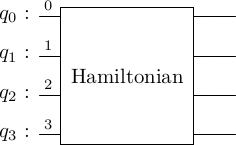

In [15]:
from qiskit.quantum_info import Pauli
I = Pauli('IIII').to_matrix()
E12 = Pauli('IIZZ').to_matrix() # inverse ordering
E13 = Pauli('IZIZ').to_matrix()
E14 = Pauli('ZIIZ').to_matrix()
E23 = Pauli('IZZI').to_matrix()
E24 = Pauli('ZIZI').to_matrix()
H = - (I-E12)/2 - (I-E13)/2 - (I-E14)/2 - (I-E23)/2 - (I-E24)/2
display(array_to_latex(H))
expH = HamiltonianGate(H,1)
circH = QuantumCircuit(4)
circH = circH.compose(expH)
display(array_to_latex(Operator(circH)))
circH.draw('latex')

In [16]:
psi_in = Statevector.from_int(1, 2**4)
display(psi_in.draw('latex'))
psi_out = psi_in.evolve(circH)
display(psi_out.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Variational circuit

In [17]:
from qiskit.circuit import Parameter

theta = Parameter('theta')
expHz = HamiltonianGate(H,theta)
circHz = QuantumCircuit(4, name='Hz')
circHz = circHz.compose(expHz)
# display(circHz.draw('latex'))
# display(array_to_latex(Operator(circHz)))

In [18]:
# mixer Hamiltonian
X1 = Pauli('IIIX').to_matrix()
X2 = Pauli('IIXI').to_matrix()
X3 = Pauli('IXII').to_matrix()
X4 = Pauli('XIII').to_matrix()
H2 = X1 + X2 + X3 + X4

phi = Parameter('phi')
expHx = HamiltonianGate(H2,phi)
circHx = QuantumCircuit(4, name='Hx')
circHx = circHx.compose(expHx)
# display(array_to_latex(Operator(circHx)))
# display(circHx.draw('latex'))
# circHx = circHx.compose(expHz)
# # circHx.compose()
# # circHx.compose(circHz, [0,3])
# display(array_to_latex(Operator(circHx)))
# circHx.draw('latex')

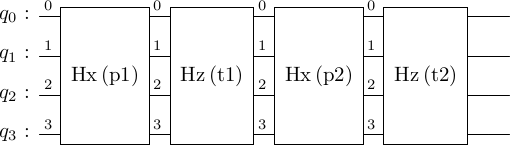

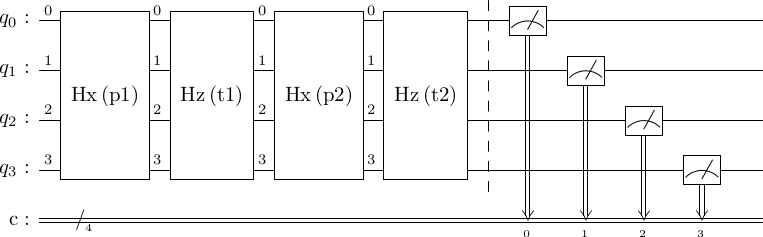

In [19]:
# compose layers

t1 = Parameter('t1')
t2 = Parameter('t2')
p1 = Parameter('p1')
p2 = Parameter('p2')

QAOA = QuantumCircuit(4)
QAOA = QAOA.compose(circHx.to_instruction({phi: p1}))
QAOA = QAOA.compose(circHz.to_instruction({theta: t1}))
QAOA = QAOA.compose(circHx.to_instruction({phi: p2}))
QAOA = QAOA.compose(circHz.to_instruction({theta: t2}))
display(QAOA.draw('latex'))

# append measurement circuit
meas = QuantumCircuit(4, 4)
meas.barrier(range(4))
meas.measure(range(4), range(4))
QAOA = QAOA.compose(meas)
display(QAOA.draw('latex'))

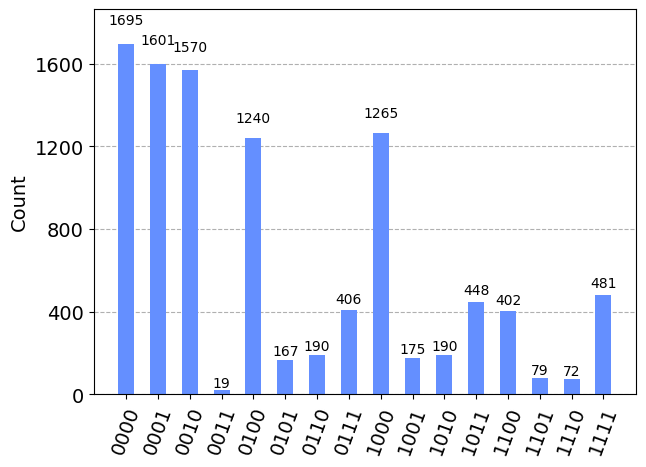

In [20]:
circ = QAOA.bind_parameters(
        {t1: 1/5*np.pi, t2: 0, p1: 1/4*np.pi, p2: 0.6*np.pi})

backend = Aer.get_backend('aer_simulator')
job = backend.run(transpile(circ, backend), shots=10000)
counts = job.result().get_counts()
plot_histogram(counts)

Extra:
 - QAOA on larger depth, more vertices, combine with optimizer (see for instance notebook by Ruslan Shaydulin: https://github.com/rsln-s/QAOA_tutorial/blob/main/Hands-on.ipynb)
 - 